In [1]:
# https://ppiazi.tistory.com/entry/python-cyclomatic-complexity-%EB%AA%A8%EB%93%88-lizard

In [2]:
# https://github.com/terryyin/lizard

In [3]:
# pip install cognitive_complexity

In [4]:
# pip install statsmodels

In [5]:
# pip install --upgrade pandas==2.2.0

In [6]:
# import numpy as np
# np.__version__

In [7]:
# pip install --upgrade numexpr==2.8.4

In [8]:
# pip install linearmodels

In [99]:
# pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [105]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import ast
from cognitive_complexity.api import get_cognitive_complexity
import pprint
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.formula.api as sm
import datetime
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import seaborn as sns
import matplotlib.patches as mpatches

### 소스코드 complexity 계산

In [10]:
input_year_list = ['2021', '2022', '2023']

In [11]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/complexity_python_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [12]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [13]:
# 전체 데이터셋 
with open('../../data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [14]:
src_df.head()

,idx,id,src
0,995,77296103,from copy import deepcopy\nfrom typing import ...
1,996,77296116,"preprocessing = ColumnTransformer([(""One Hot E..."
2,997,77296116,"SVC_model = Pipeline([(""preprocessing"", prepro..."
3,998,77296116,"svc_params = {\n'kernel': [""linear"", ""poly"", ""..."
4,999,77296116,# Access the cross-validation results from the...


In [15]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/calc_com_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

### complexity 결과 확인

In [16]:
# 503571
calc_com_df.groupby(['Path']).count()

,File Name,Cognitive Complexity
Path,,
0_70702244.py,1,1
0_74935859.py,1,1
100000_69208993.py,1,1
100000_73587727.py,1,1
100001_73587745.py,1,1
...,...,...
999_77296116.py,1,1
99_74930265.py,1,1
9_70397958.py,1,1


In [17]:
complexity_python_df[complexity_python_df['id'] ==70702244]

,id,cdate,title,body
1,70702244,2021-12-28,Best way to manage y/n and password prompts th...,<p>I am creating a Python script to install AU...


In [18]:
src_df[src_df['id'] ==70702244]

,idx,id,src
11055,0,70702244,cmd = r'yes y | makepkg -si'\noutput = subproc...


In [19]:
calc_com_df.reset_index(drop=True, inplace=True)

In [20]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [21]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [22]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [23]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [24]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [25]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [26]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [27]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939219 entries, 0 to 939218
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   idx     939219 non-null  int64 
 1   id      939219 non-null  int64 
 2   src     939219 non-null  object
dtypes: int64(2), object(1)
memory usage: 21.5+ MB


In [28]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [29]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [30]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


### understandable하지 않은 것 

In [31]:
calc_com_df['cdate'].min()

'2021-01-01'

In [32]:
calc_com_df['cdate'].max()

'2023-12-03'

In [33]:
calc_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
...,...,...,...,...,...,...,...
939214,77473871,2023-11-13,189337,export emp_code='IT'\nexport _emp_url= '\n'IT'...,NaN,NaN,NaN
939215,77473871,2023-11-13,189338,import os\nfrom os import listdir\nfrom os.pat...,NaN,NaN,NaN
939216,77473875,2023-11-13,189339,"_version_mismatch_error(metadata_dict[""kedro_i...",NaN,NaN,NaN
939217,77473880,2023-11-13,189340,"def sample_run_report(credentials=None, proper...",NaN,NaN,NaN


In [34]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [35]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [36]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0
...,...,...,...,...,...,...,...
751579,77593648,2023-12-03,191636,\nimport os\nimport polars as pl\n\ndef split_...,191636_77593648.py,191636_77593648.py,2.0
751585,77593680,2023-12-03,191589,import numpy as np\nimport pandas as pd\nimpor...,191589_77593680.py,191589_77593680.py,0.0
751591,77593717,2023-12-03,191590,import hashlib\n\nuser_hash_dict = {}\n\nwith ...,191590_77593717.py,191590_77593717.py,6.0
745960,77593807,2023-12-03,193259,# -*- coding: cp1251 -*- #перекодирование файл...,193259_77593807.py,193259_77593807.py,6.0


In [37]:
calc_ed_cnt = calc_ed_com_df.groupby(['cdate']).count()[['id']].reset_index()

In [38]:
not_calc_ed_cnt = calc_com_df[calc_com_df['Path'].isna()].groupby(['cdate']).count()[['id']].reset_index()

In [39]:
calc_ed_cnt.head()

,cdate,id
0,2021-01-01,229
1,2021-01-02,302
2,2021-01-03,318
3,2021-01-04,391
4,2021-01-05,421


In [40]:
not_calc_ed_cnt

,cdate,id
0,2021-01-01,357
1,2021-01-02,410
2,2021-01-03,431
3,2021-01-04,599
4,2021-01-05,597
...,...,...
1062,2023-11-29,296
1063,2023-11-30,288
1064,2023-12-01,226
1065,2023-12-02,146


In [41]:
calc_ed_cnt['yyyymm'] = calc_ed_cnt['cdate'].str[:7]

In [42]:
major_xticks = calc_ed_cnt.groupby(['yyyymm']).max()['cdate'].to_list()
major_xticks = major_xticks[:-1]

In [43]:
calc_ed_cnt.columns = ['cdate', 'calced_cnt', 'yyyymm']
not_calc_ed_cnt.columns = ['cdate', 'notcalced_cnt']

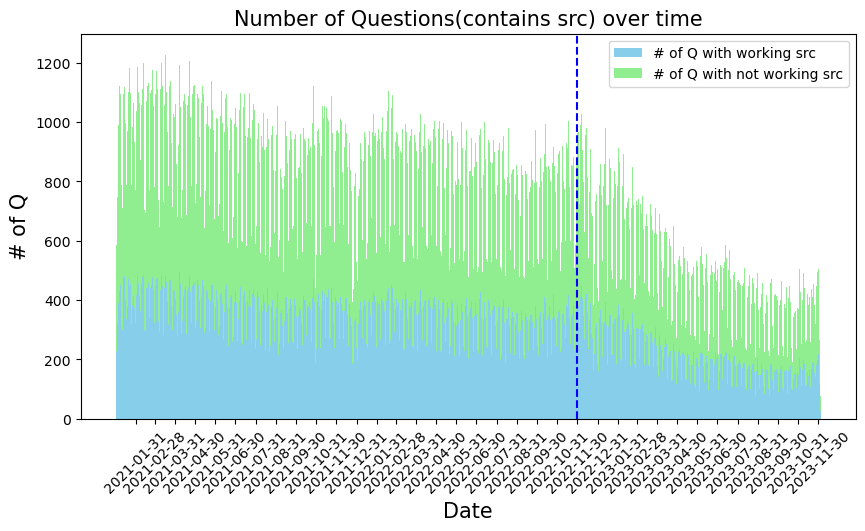

In [44]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(calc_ed_cnt['cdate'], calc_ed_cnt['calced_cnt'], color='skyblue', label = '# of Q with working src', width=1.0)
ax.bar(not_calc_ed_cnt['cdate'], not_calc_ed_cnt['notcalced_cnt'], bottom = calc_ed_cnt['calced_cnt'], color = 'lightgreen', label = '# of Q with not working src', width=1.0)

ax.set_title('Number of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [45]:
calc_ed_cnt

,cdate,calced_cnt,yyyymm
0,2021-01-01,229,2021-01
1,2021-01-02,302,2021-01
2,2021-01-03,318,2021-01
3,2021-01-04,391,2021-01
4,2021-01-05,421,2021-01
...,...,...,...
1062,2023-11-29,199,2023-11
1063,2023-11-30,218,2023-11
1064,2023-12-01,154,2023-12
1065,2023-12-02,121,2023-12


In [46]:
syn_tree_calc = pd.merge(calc_ed_cnt, not_calc_ed_cnt, on = 'cdate')

In [47]:
syn_tree_calc['calced_rate'] = (syn_tree_calc['calced_cnt']/(syn_tree_calc['calced_cnt'] + syn_tree_calc['notcalced_cnt'] ))*100

In [48]:
syn_tree_calc['notcalced_rate'] = 100 - syn_tree_calc['calced_rate']  

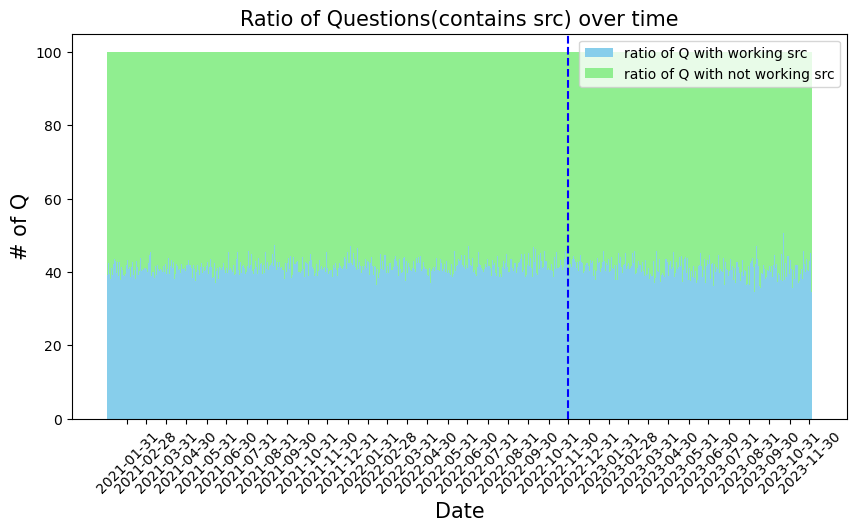

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(syn_tree_calc['cdate'], syn_tree_calc['calced_rate'], color='skyblue', label = 'ratio of Q with working src', width=1.0)
ax.bar(syn_tree_calc['cdate'], syn_tree_calc['notcalced_rate'], bottom = syn_tree_calc['calced_rate'], color = 'lightgreen', label = 'ratio of Q with not working src', width=1.0)

ax.set_title('Ratio of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [50]:
calc_ed_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0


In [51]:
calc_ed_com_box_df = calc_ed_com_df.copy()

In [52]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].str[:7]

In [53]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [54]:
ym_list

array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype=object)

In [55]:
# sharey = True ## 또는 sharey=False
# sharex = True ## 또는 sharex=False

# fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# # plt.xticks(rotation=45)
# # major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
# #                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# # yticks = np.arange(200, 2000, 400)
# axs[0].bar(calc_ed_com_df['cdate']
#         ,  calc_ed_com_df['Cognitive Complexity']
#         ,  color = 'skyblue'
#         # ,  edgecolor = 'black'
#       ) # hist type

# axs[0].set_title('Number of Questions over time', fontsize = 15)
# axs[0].set_xlabel('Date', fontsize = 15)
# axs[0].set_ylabel('# of Q', fontsize = 15)
# # axs[0].set_xticks(major_xticks)
# # axs[0].set_yticks(yticks)
# # axs[0].axvline([major_xticks[-2]], # add vertical line
# #            color = 'blue',
# #            linestyle = '--',
# #            linewidth = 1.5)
# axs[0].tick_params(axis='x', rotation=45)
# # axs[0].yticks(yt)

# axs[0].bar(calc_ed_com_df['cdate']
#         ,  calc_ed_com_df['Cognitive Complexity']
#         ,  color = 'skyblue'
#         # ,  edgecolor = 'black'
#       ) # hist type

# axs[1].set_title('Number of Answers over time', fontsize = 15)
# axs[1].set_xlabel('Date', fontsize = 15)
# axs[1].set_ylabel('# of A', fontsize = 15)
# # axs[1].set_xticks(major_xticks)
# # axs[1].set_yticks(yticks)
# # axs[1].axvline([major_xticks[-2]], # add vertical line
# #            color = 'blue',
# #            linestyle = '--',
# #            linewidth = 1.5)
# axs[1].tick_params(axis='x', rotation=45)

# plt.show();


In [56]:
calc_ed_com_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321292 entries, 395794 to 745961
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    321292 non-null  int64  
 1   cdate                 321292 non-null  object 
 2   idx                   321292 non-null  int64  
 3   src                   321292 non-null  object 
 4   Path                  321292 non-null  object 
 5   File Name             321292 non-null  object 
 6   Cognitive Complexity  321292 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 19.6+ MB


In [57]:
calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]

In [58]:
ym_list = calc_ed_com_df.groupby(['yyyymm']).max()['cdate'].values[:-1]

In [59]:
ym_list

array(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
       '2023-09-30', '2023-10-31', '2023-11-30'], dtype=object)

In [60]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['cdate']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [61]:
calc_ed_com_median_df = calc_ed_com_df.groupby(['cdate']).median(numeric_only=True).reset_index()

In [62]:

calc_ed_com_mean_df.loc[calc_ed_com_mean_df['cdate'].isin(major_xticks), 'Cognitive Complexity'].values
# 

array([1.44736842, 1.36137072, 1.47659574, 2.05276382, 1.24734043,
       1.96287703, 1.50423729, 1.08064516, 1.39753086, 1.67948718,
       1.0201005 , 1.2125    , 1.23834197, 1.24528302, 1.56036446,
       1.45660377, 1.16878981, 1.24858757, 1.1965812 , 1.55932203,
       1.24041812, 1.27859238, 1.33776596, 1.73224044, 1.7957958 ,
       1.42810458, 1.38888889, 1.89285714, 1.64102564, 2.17840376,
       1.94444444, 2.05952381, 1.2987013 , 1.85616438, 2.41284404])

In [63]:
end_of_month_indices = list(calc_ed_com_mean_df.loc[calc_ed_com_mean_df['cdate'].isin(major_xticks), :].index)

In [64]:
calc_ed_com_mean_df[calc_ed_com_mean_df['cdate'].isin(ym_list)]
# .iloc[end_of_month_indices, 3]
# ['cdate']

,cdate,id,idx,Cognitive Complexity
30,2021-01-31,6.598020e+07,349195.444444,1.447368
58,2021-02-28,6.640979e+07,326943.065421,1.361371
89,2021-03-31,6.688880e+07,278605.931915,1.476596
119,2021-04-30,6.733412e+07,255987.414573,2.052764
150,2021-05-31,6.777441e+07,209969.007979,1.247340
180,2021-06-30,6.819539e+07,183648.120650,1.962877
211,2021-07-31,6.860220e+07,146066.860169,1.504237
242,2021-08-31,6.899926e+07,114366.201613,1.080645
272,2021-09-30,6.939257e+07,87076.913580,1.397531
303,2021-10-31,6.978732e+07,48798.457265,1.679487


In [65]:
end_of_month_indices

[30,
 58,
 89,
 119,
 150,
 180,
 211,
 242,
 272,
 303,
 333,
 364,
 395,
 423,
 454,
 484,
 515,
 545,
 576,
 607,
 637,
 668,
 698,
 729,
 760,
 788,
 819,
 849,
 880,
 910,
 941,
 972,
 1002,
 1033,
 1063]

In [66]:
calc_ed_com_mean_df.iloc[end_of_month_indices]

,cdate,id,idx,Cognitive Complexity
30,2021-01-31,6.598020e+07,349195.444444,1.447368
58,2021-02-28,6.640979e+07,326943.065421,1.361371
89,2021-03-31,6.688880e+07,278605.931915,1.476596
119,2021-04-30,6.733412e+07,255987.414573,2.052764
150,2021-05-31,6.777441e+07,209969.007979,1.247340
180,2021-06-30,6.819539e+07,183648.120650,1.962877
211,2021-07-31,6.860220e+07,146066.860169,1.504237
242,2021-08-31,6.899926e+07,114366.201613,1.080645
272,2021-09-30,6.939257e+07,87076.913580,1.397531
303,2021-10-31,6.978732e+07,48798.457265,1.679487


In [67]:
print(len(ym_list))
print(calc_ed_com_mean_df.iloc[end_of_month_indices, 3].values)

35
[1.44736842 1.36137072 1.47659574 2.05276382 1.24734043 1.96287703
 1.50423729 1.08064516 1.39753086 1.67948718 1.0201005  1.2125
 1.23834197 1.24528302 1.56036446 1.45660377 1.16878981 1.24858757
 1.1965812  1.55932203 1.24041812 1.27859238 1.33776596 1.73224044
 1.7957958  1.42810458 1.38888889 1.89285714 1.64102564 2.17840376
 1.94444444 2.05952381 1.2987013  1.85616438 2.41284404]


In [70]:
calc_ed_com_mean_df['cdate'] = pd.to_datetime(calc_ed_com_mean_df['cdate'])
calc_ed_com_mean_df['is_wednesday'] = calc_ed_com_mean_df['cdate'].dt.weekday == 2  # 수요일인지 확인 (월=0, 화=1, 수=2, ...)
calc_ed_com_mean_df['month'] = calc_ed_com_mean_df['cdate'].dt.month
calc_ed_com_mean_df['year'] = calc_ed_com_mean_df['cdate'].dt.year

# 매월 마지막 수요일 필터링
last_wednesdays_df = calc_ed_com_mean_df[calc_ed_com_mean_df['is_wednesday']].groupby(['year', 'month']).tail(1)

In [71]:
last_wednesdays_df

,cdate,id,idx,Cognitive Complexity,is_wednesday,month,year
26,2021-01-27,6.592020e+07,358164.024096,1.332530,True,1,2021
54,2021-02-24,6.635218e+07,337286.367521,1.200855,True,2,2021
89,2021-03-31,6.688880e+07,278605.931915,1.476596,True,3,2021
117,2021-04-28,6.730074e+07,260565.071429,1.383117,True,4,2021
145,2021-05-26,6.770538e+07,220571.676404,1.505618,True,5,2021
180,2021-06-30,6.819539e+07,183648.120650,1.962877,True,6,2021
208,2021-07-28,6.856075e+07,152537.369266,1.435780,True,7,2021
236,2021-08-25,6.892338e+07,121044.560748,1.509346,True,8,2021
271,2021-09-29,6.937757e+07,89335.270833,1.330729,True,9,2021
299,2021-10-27,6.973944e+07,56380.454352,1.532909,True,10,2021


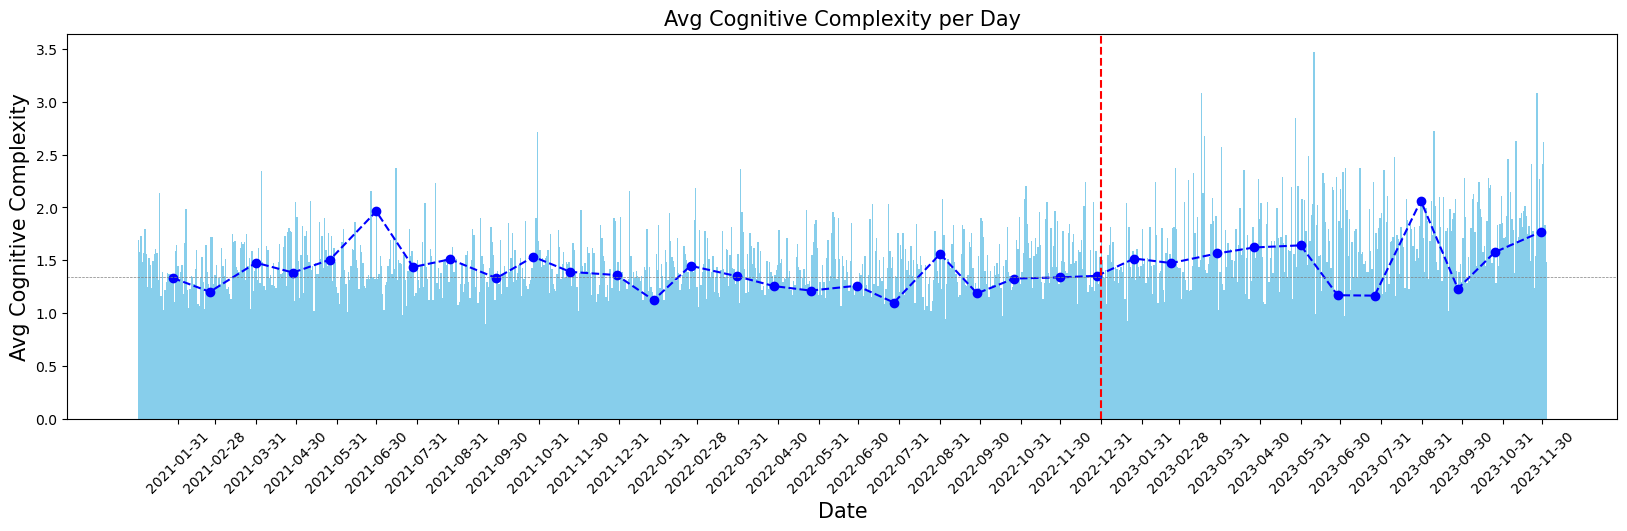

In [72]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)


axs1_xticks = ym_list
# axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(200, 2000, 400)
axs.bar( 
           calc_ed_com_mean_df['cdate']
        ,  calc_ed_com_mean_df['Cognitive Complexity']
        ,  color = 'skyblue'
        , width=1.0
        # ,  edgecolor = 'black'
      ) # hist type

axs.plot(   last_wednesdays_df['cdate'].values
         , last_wednesdays_df['Cognitive Complexity'].values
         , color='b'
         , linestyle='--'
         , marker='o'
         , label='Monthly End') ## 선 그래프 출력

axs.set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs.set_xlabel('Date', fontsize = 15)
axs.set_ylabel('Avg Cognitive Complexity', fontsize = 15)
axs.set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs.axhline(1.337766, # add vertical line
           color = 'gray',
           linestyle = '--',
           linewidth = 0.5)
axs.axvline([axs1_xticks[23]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs.tick_params(axis='x', rotation=45)
# x_labels = [f'Year {((m-1)//12)+1} - Month {((m-1)%12)+1}' if m % 2 == 1 else '' for m in months]
# plt.xticks(months, x_labels, rotation=45, ha='right')  # x축 레이블 변경, 45도 회전


plt.show();


In [73]:
calc_ed_com_mean_df['weekday'] = calc_ed_com_mean_df['cdate'].dt.weekday # 수요일인지 확인 (월=0, 화=1, 수=2, ...)

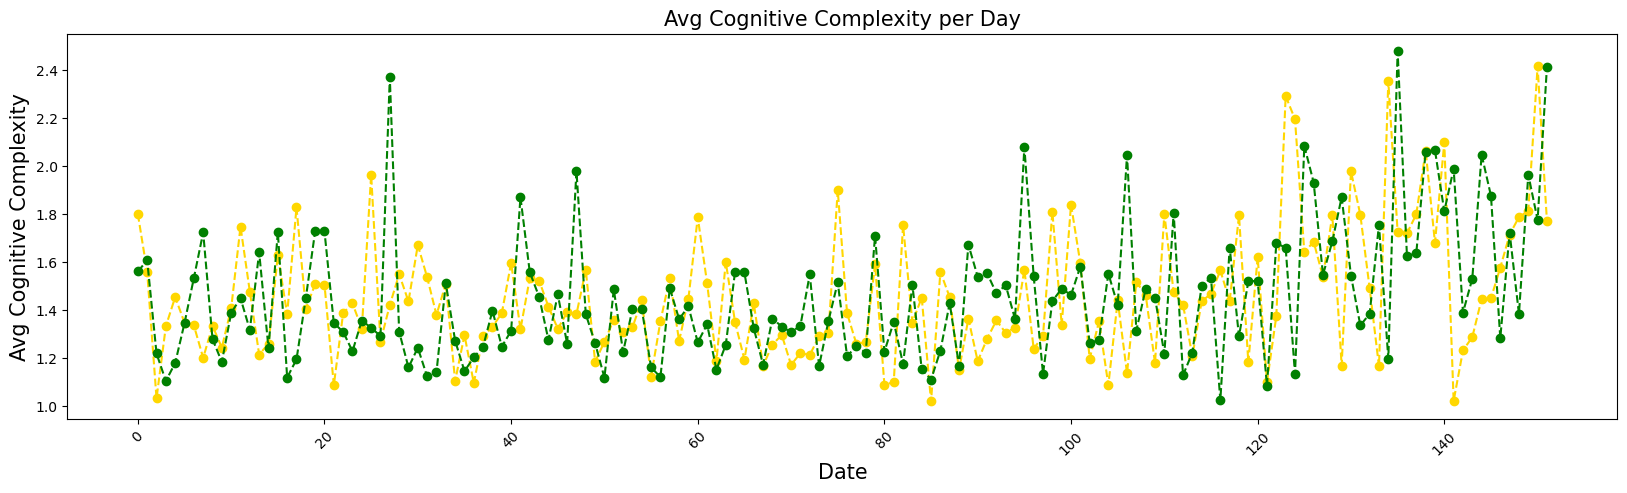

In [74]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)

axs1_xticks = ym_list
color_dict = {  0 : 'darkred'
              , 1 : 'orange'
              , 2 : 'gold'
              , 3 : 'green'
              , 4 : 'blue'
              , 5 : 'darkblue'
              , 6 : 'purple'
              }
# for wd in range(3) : 
for wd in [2, 3] : 
    axs.plot( np.arange(len(calc_ed_com_mean_df.loc[calc_ed_com_mean_df['weekday'] == wd, 'cdate'].values))
            , calc_ed_com_mean_df.loc[calc_ed_com_mean_df['weekday'] == wd, 'Cognitive Complexity'].values
            , color=color_dict[wd]
            , linestyle='--'
            , marker='o'
            , label='Monthly End') ## 선 그래프 출력

axs.set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs.set_xlabel('Date', fontsize = 15)
axs.set_ylabel('Avg Cognitive Complexity', fontsize = 15)
# axs.set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs.tick_params(axis='x', rotation=45)
# x_labels = [f'Year {((m-1)//12)+1} - Month {((m-1)%12)+1}' if m % 2 == 1 else '' for m in months]
# plt.xticks(months, x_labels, rotation=45, ha='right')  # x축 레이블 변경, 45도 회전


plt.show();


In [75]:
calc_ed_com_mean_df

,cdate,id,idx,Cognitive Complexity,is_wednesday,month,year,weekday
0,2021-01-01,6.553101e+07,394448.410480,1.689956,False,1,2021,4
1,2021-01-02,6.554027e+07,393165.784768,1.582781,False,1,2021,5
2,2021-01-03,6.555093e+07,391343.544025,1.729560,False,1,2021,6
3,2021-01-04,6.556447e+07,389050.580563,1.485934,False,1,2021,0
4,2021-01-05,6.558022e+07,387018.978622,1.570071,False,1,2021,1
...,...,...,...,...,...,...,...,...
1062,2023-11-29,7.757138e+07,131455.291457,1.768844,True,11,2023,2
1063,2023-11-30,7.757884e+07,192526.642202,2.412844,False,11,2023,3
1064,2023-12-01,7.758570e+07,191990.188312,2.616883,False,12,2023,4
1065,2023-12-02,7.759073e+07,191740.652893,1.834711,False,12,2023,5


In [76]:
calc_ed_com_box_df = calc_ed_com_mean_df.copy()

In [77]:
calc_ed_com_box_df

,cdate,id,idx,Cognitive Complexity,is_wednesday,month,year,weekday
0,2021-01-01,6.553101e+07,394448.410480,1.689956,False,1,2021,4
1,2021-01-02,6.554027e+07,393165.784768,1.582781,False,1,2021,5
2,2021-01-03,6.555093e+07,391343.544025,1.729560,False,1,2021,6
3,2021-01-04,6.556447e+07,389050.580563,1.485934,False,1,2021,0
4,2021-01-05,6.558022e+07,387018.978622,1.570071,False,1,2021,1
...,...,...,...,...,...,...,...,...
1062,2023-11-29,7.757138e+07,131455.291457,1.768844,True,11,2023,2
1063,2023-11-30,7.757884e+07,192526.642202,2.412844,False,11,2023,3
1064,2023-12-01,7.758570e+07,191990.188312,2.616883,False,12,2023,4
1065,2023-12-02,7.759073e+07,191740.652893,1.834711,False,12,2023,5


In [78]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].apply(lambda x : str(x.year)+'-'+str(x.month))

In [79]:
calc_ed_com_box_df.head()

,cdate,id,idx,Cognitive Complexity,is_wednesday,month,year,weekday,yyyymm
0,2021-01-01,6.553101e+07,394448.410480,1.689956,False,1,2021,4,2021-1
1,2021-01-02,6.554027e+07,393165.784768,1.582781,False,1,2021,5,2021-1
2,2021-01-03,6.555093e+07,391343.544025,1.729560,False,1,2021,6,2021-1
3,2021-01-04,6.556447e+07,389050.580563,1.485934,False,1,2021,0,2021-1
4,2021-01-05,6.558022e+07,387018.978622,1.570071,False,1,2021,1,2021-1


In [80]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [81]:
[calc_ed_com_box_df[calc_ed_com_box_df['yyyymm']==x]  for x in ym_list]

[        cdate            id            idx  Cognitive Complexity  \
 0  2021-01-01  6.553101e+07  394448.410480              1.689956   
 1  2021-01-02  6.554027e+07  393165.784768              1.582781   
 2  2021-01-03  6.555093e+07  391343.544025              1.729560   
 3  2021-01-04  6.556447e+07  389050.580563              1.485934   
 4  2021-01-05  6.558022e+07  387018.978622              1.570071   
 5  2021-01-06  6.559657e+07  384469.386946              1.799534   
 6  2021-01-07  6.561353e+07  381646.135255              1.560976   
 7  2021-01-08  6.563008e+07  378641.435065              1.246753   
 8  2021-01-09  6.564333e+07  376406.191558              1.522727   
 9  2021-01-10  6.565439e+07  374843.337793              1.454849   
 10 2021-01-11  6.566767e+07  373144.334171              1.238693   
 11 2021-01-12  6.568548e+07  382444.882353              1.489496   
 12 2021-01-13  6.570280e+07  391869.869295              1.558091   
 13 2021-01-14  6.572058e+07  3890

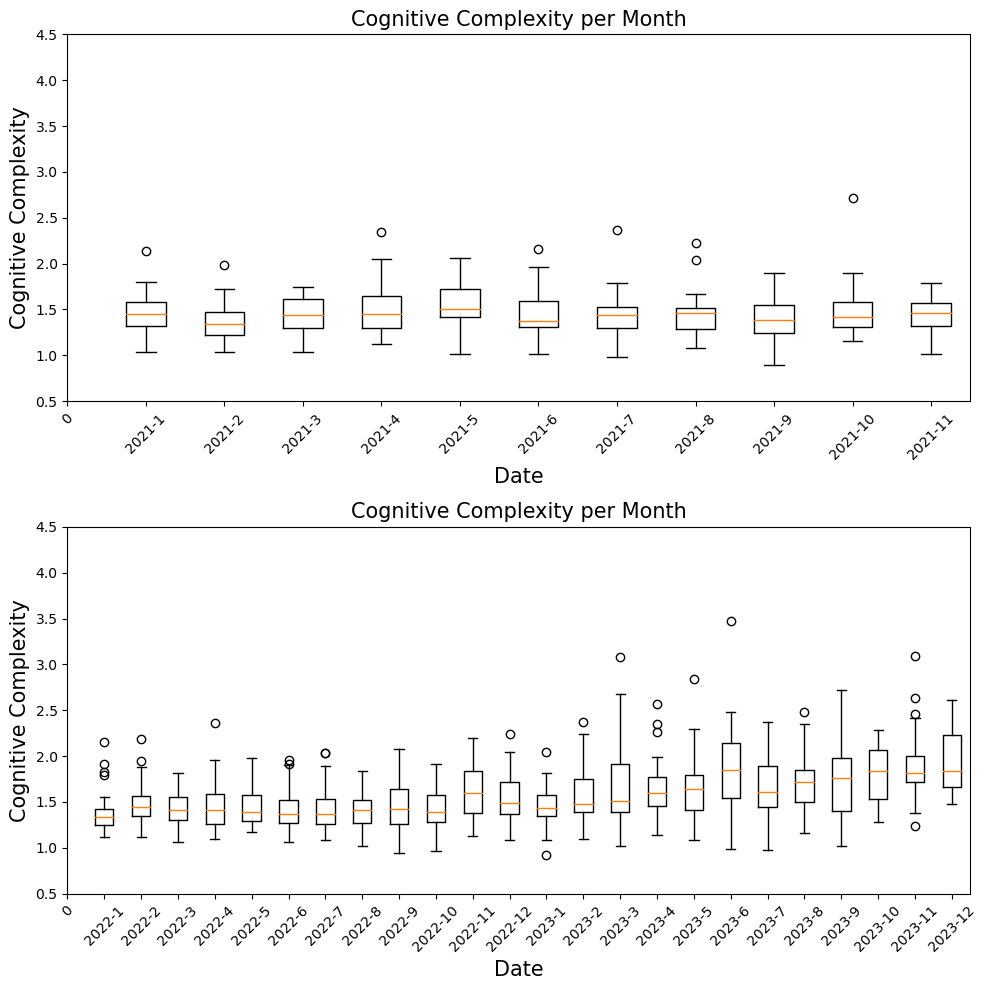

In [82]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)

axs[0].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [83]:
ym_list[8:15]

array(['2021-9', '2021-10', '2021-11', '2021-12', '2022-1', '2022-2',
       '2022-3'], dtype=object)

In [84]:
ym_list[20:27]

array(['2022-9', '2022-10', '2022-11', '2022-12', '2023-1', '2023-2',
       '2023-3'], dtype=object)

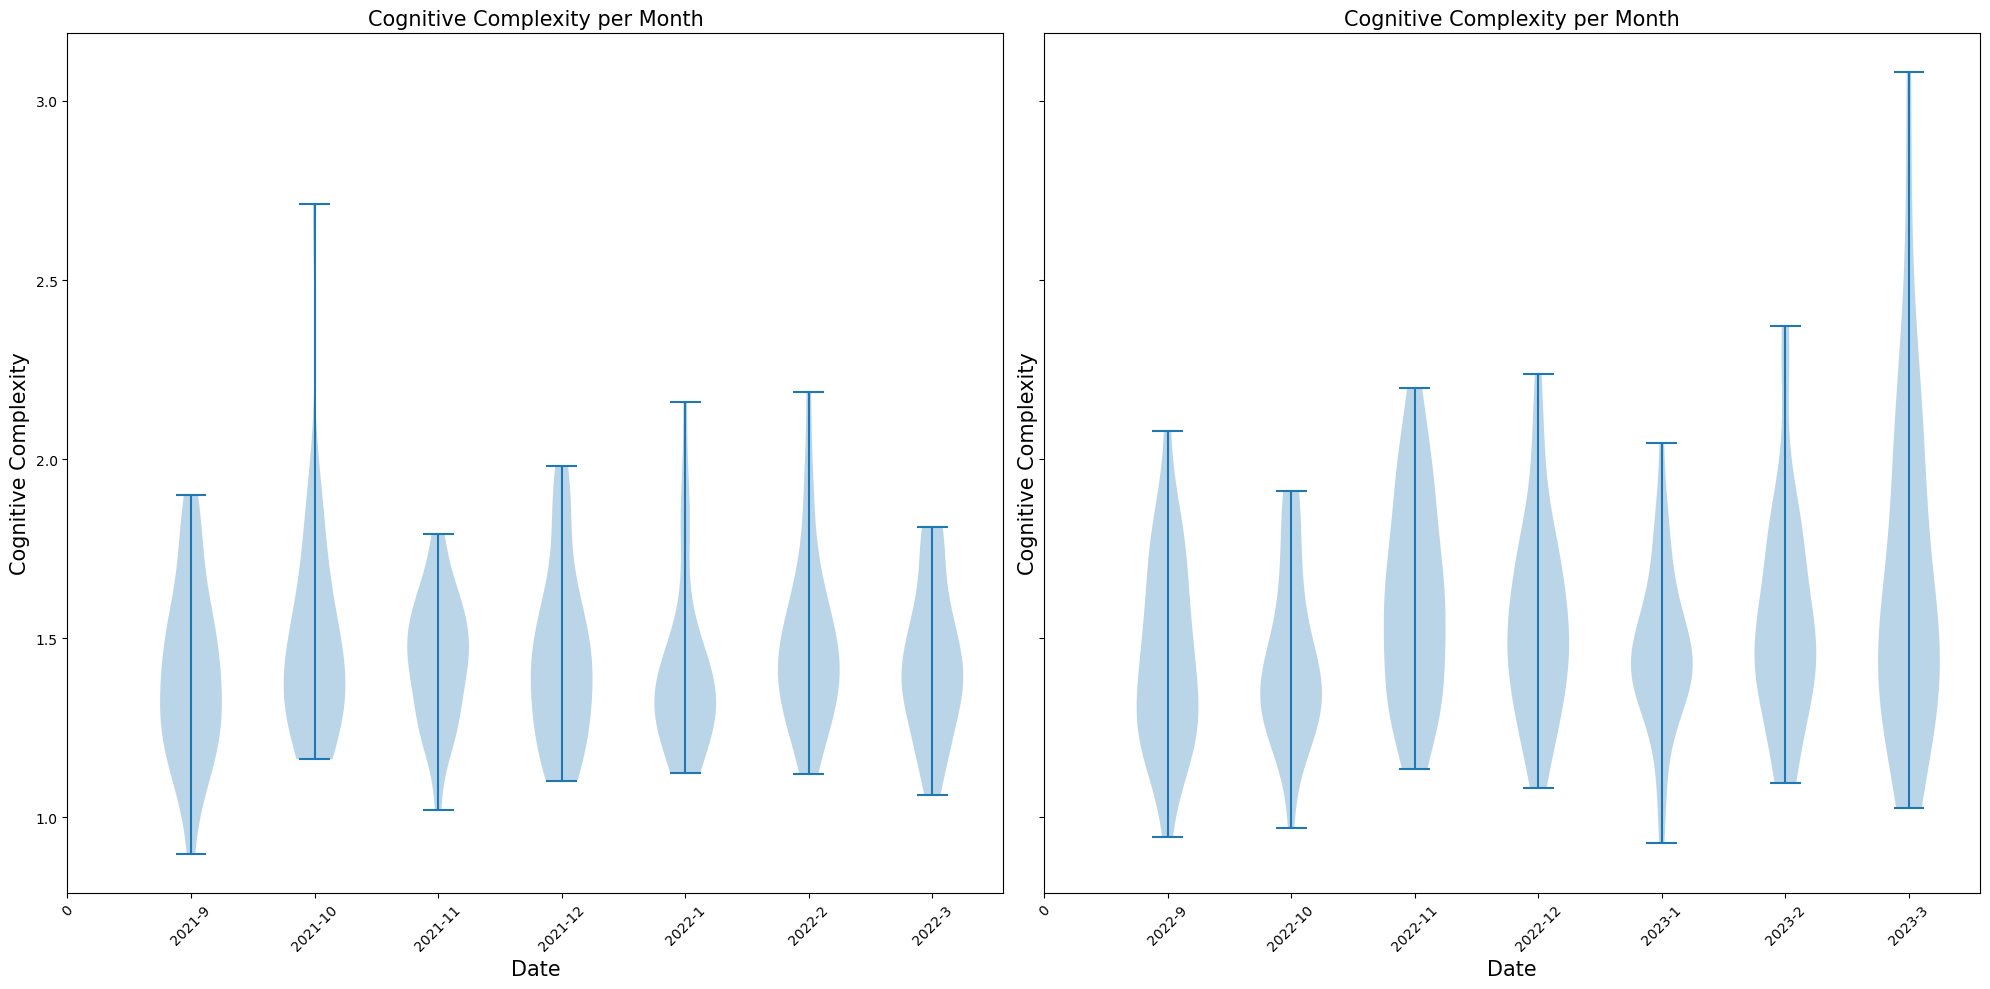

In [85]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[8:15]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[20:27]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(0.5, 5, 0.5)


axs[0].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[8:15]], positions=np.arange(1, 8, 1))
axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
# axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)



axs[1].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[20:27]], positions=np.arange(1, 8, 1))
axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [86]:
calc_ed_com_box_df

,cdate,id,idx,Cognitive Complexity,is_wednesday,month,year,weekday,yyyymm
0,2021-01-01,6.553101e+07,394448.410480,1.689956,False,1,2021,4,2021-1
1,2021-01-02,6.554027e+07,393165.784768,1.582781,False,1,2021,5,2021-1
2,2021-01-03,6.555093e+07,391343.544025,1.729560,False,1,2021,6,2021-1
3,2021-01-04,6.556447e+07,389050.580563,1.485934,False,1,2021,0,2021-1
4,2021-01-05,6.558022e+07,387018.978622,1.570071,False,1,2021,1,2021-1
...,...,...,...,...,...,...,...,...,...
1062,2023-11-29,7.757138e+07,131455.291457,1.768844,True,11,2023,2,2023-11
1063,2023-11-30,7.757884e+07,192526.642202,2.412844,False,11,2023,3,2023-11
1064,2023-12-01,7.758570e+07,191990.188312,2.616883,False,12,2023,4,2023-12
1065,2023-12-02,7.759073e+07,191740.652893,1.834711,False,12,2023,5,2023-12


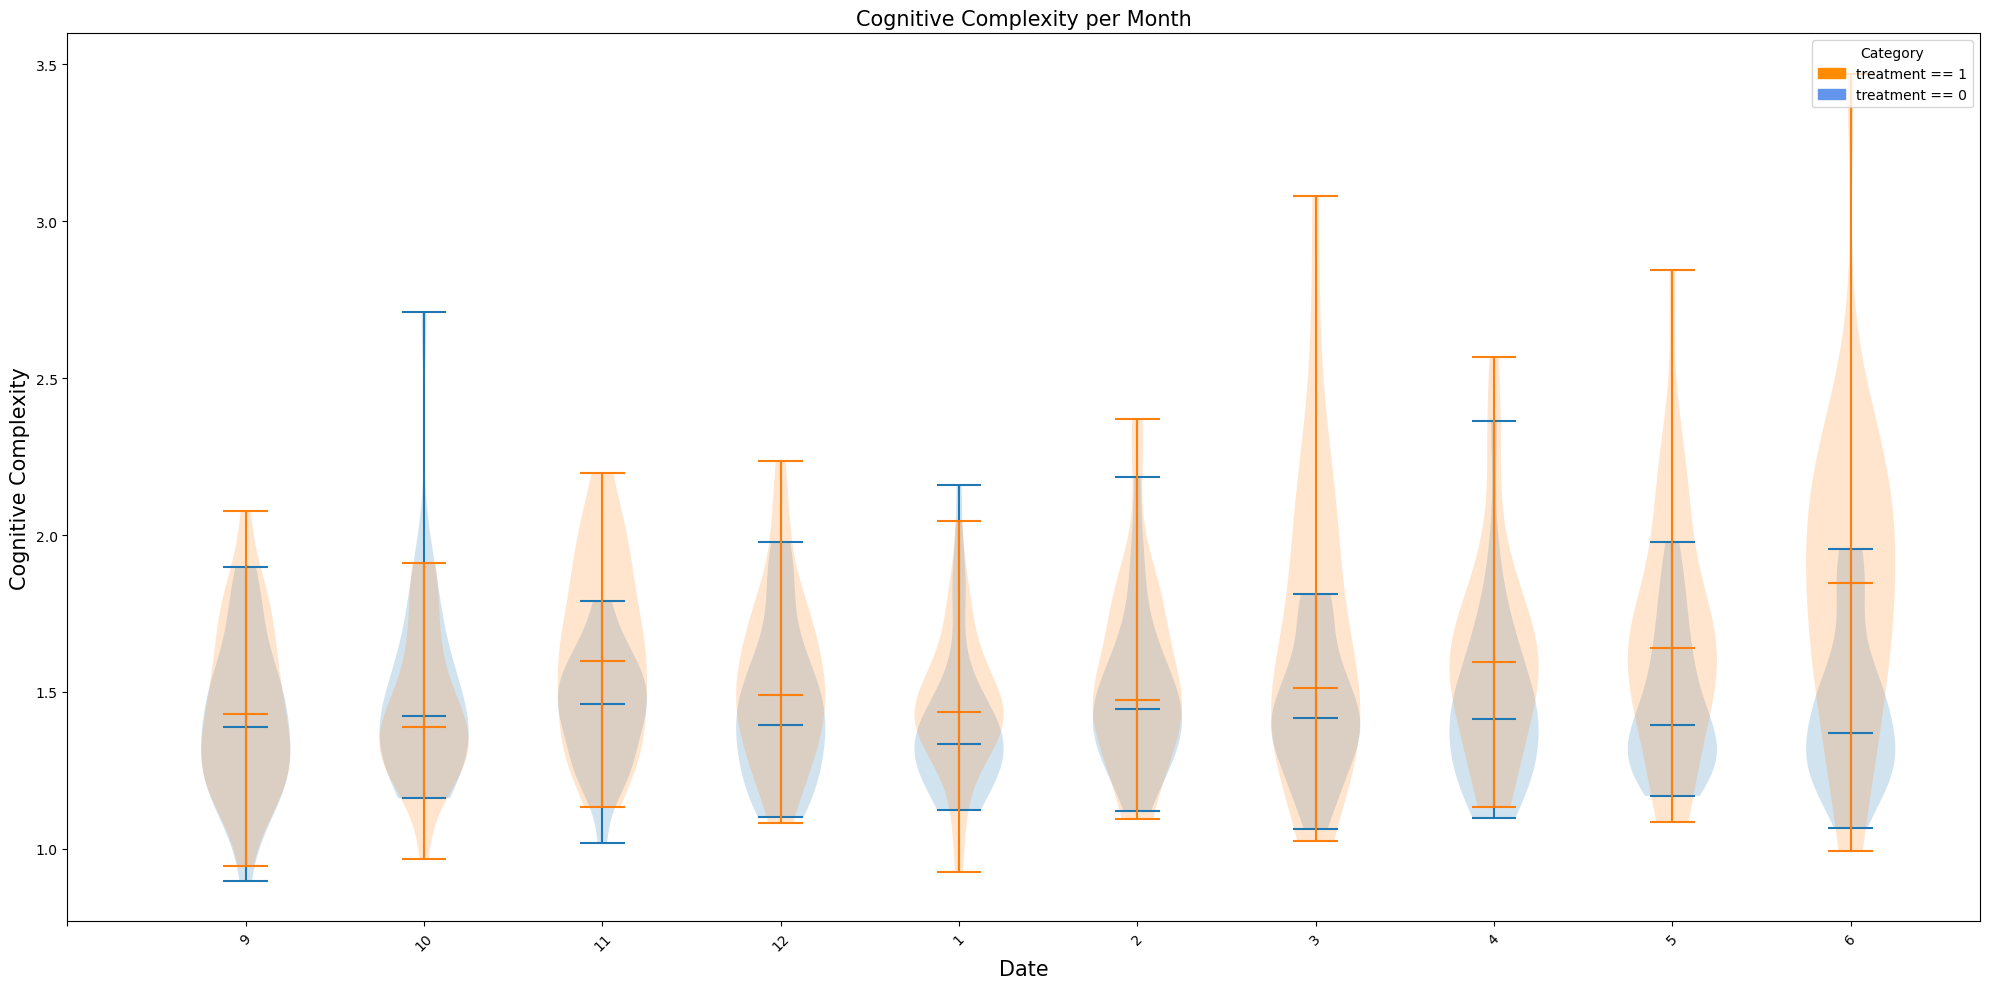

In [111]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots( figsize = (20, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[8:18]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[20:30]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(0.5, 5, 0.5)


part_a = axs.violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[8:18]], positions=np.arange(1, 11, 1), showmedians=True)
part_b = axs.violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[20:30]], positions=np.arange(1, 11, 1), showmedians=True)

for pc in part_a['bodies']:
    # pc.set_facecolor('skyblue')
    pc.set_alpha(0.2)

for pc in part_b['bodies']:
    # pc.set_facecolor('lightgreen')
    pc.set_alpha(0.2)


axs.set_title('Cognitive Complexity per Month', fontsize = 15)
axs.set_xlabel('Date', fontsize = 15)
axs.set_ylabel('Cognitive Complexity', fontsize = 15)
axs.set_xticks(range(len(axs0_xticks)), [x[5:] for x in axs0_xticks])
# axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs.tick_params(axis='x', rotation=45)

blue_patch = mpatches.Patch(color='cornflowerblue', label='treatment == 0')
orange_patch = mpatches.Patch(color='darkorange', label='treatment == 1')
axs.legend(handles=[orange_patch, blue_patch], title="Category")


# axs.set_title('Cognitive Complexity per Month', fontsize = 15)
# axs.set_xlabel('Date', fontsize = 15)
# axs.set_ylabel('Cognitive Complexity', fontsize = 15)
# axs.set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
# axs.tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [ ]:
ym_lis

In [143]:
cond1 = calc_ed_com_mean_df['cdate']>='2021-10-06'
cond2 = calc_ed_com_mean_df['cdate']<='2022-03-15'
cond3 = calc_ed_com_mean_df['cdate']>='2022-10-05'
cond4 = calc_ed_com_mean_df['cdate']<='2023-03-14'

In [144]:
calc_ed_com_mean_df['cdate'] = pd.to_datetime(calc_ed_com_mean_df['cdate'])

In [145]:
bf = calc_ed_com_mean_df[(cond1&cond2)].copy()
af = calc_ed_com_mean_df[(cond3&cond4)].copy()

In [146]:
bf.loc[:,  'rel_days'] = bf.loc[:,  'cdate'] - datetime.datetime(2021,12,1 )
af.loc[:,  'rel_days'] = af.loc[:, 'cdate'] - datetime.datetime(2022,11,30)

In [147]:
bf.loc[:, 'treat'] = 0
af.loc[:, 'treat'] = 1

bf.loc[:, 'T_d'] = 0
af.loc[:, 'T_d'] = 1

In [148]:
bf['P_t'] = np.where(bf['cdate']>= '2021-11-30', 1, 0)
af['P_t'] = np.where(af['cdate']>= '2022-12-01', 1, 0)

In [ ]:
bf[bf['cdate']>= '2021-11-29']

In [ ]:
af[af['cdate']>= '2022-11-29']

In [152]:
bf['rel_week'] = np.floor(bf['rel_days'].dt.days/7)
af['rel_week'] = np.floor(af['rel_days'].dt.days/7)

In [153]:
bf[['treat', 'rel_week']] = bf[['treat', 'rel_week']].astype(int)
af[['treat', 'rel_week']] = af[['treat', 'rel_week']].astype(int)

In [154]:
bf['rel_week'] = pd.Categorical(bf['rel_week'])
af['rel_week'] = pd.Categorical(af['rel_week'])

In [155]:
bfaf = pd.concat([bf, af], axis = 0)

In [ ]:
bfaf.head()

In [159]:
bfaf = bfaf.rename(columns={'Cognitive Complexity':'cc'})

In [ ]:
data

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# 예제 데이터프레임
data = pd.DataFrame({
    'date': pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']),
    'treat': [1, 1, 1, 1, 0, 0, 0, 0],  # 처리 그룹과 통제 그룹 구분
    'outcome': [10, 15, 20, 25, 8, 10, 12, 15]  # 종속 변수
})

# 두 개의 기준점 설정
cutoff_date_1 = pd.to_datetime("2021-01-01")  # 첫 번째 기준점
cutoff_date_2 = pd.to_datetime("2023-01-01")  # 두 번째 기준점

# 첫 번째 기간의 처리 이후 여부(post_1)와 두 번째 기간의 처리 이후 여부(post_2)
data['post_1'] = (data['date'] >= cutoff_date_1) & (data['date'] < cutoff_date_2)
data['post_2'] = (data['date'] >= cutoff_date_2)

# 상호작용 변수 생성
data['treat_post_1'] = data['treat'] * data['post_1']
data['treat_post_2'] = data['treat'] * data['post_2']

# Difference-in-Differences 모델 정의 및 적합
# 두 개의 기간을 반영한 DID 모델을 정의
model = smf.ols('outcome ~ treat + post_1 + post_2 + treat_post_1 + treat_post_2', data=data).fit()

# 결과 출력
print(model.summary())

In [ ]:
sm.ols('cc ~ T_d + P_t + T_d * P_t', bfaf).fit().summary().tables[1]

In [ ]:
bfaf

In [100]:
bfaf = bfaf.rename(columns={'Cognitive Complexity': 'cc'})

In [101]:
bfaf_test = bfaf.copy()

In [102]:
bfaf_test['cc'] = bfaf_test['cc'].astype('int')

In [103]:
bfaf_test = bfaf_test.set_index('cdate')

In [ ]:
bfaf_test.columns

In [114]:
bfaf_test = bfaf_test[['cc', 'treat', 'rel_week']].copy()

In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('cc ~ C(rel_week) * treat + 1',data=bfaf_test)
# result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
bfaf_test.info()

In [ ]:
bfaf_test.info()

In [ ]:
bfaf_test[['cc', 'treat', 'rel_week']]